<a href="https://colab.research.google.com/github/umiSirya/Weather_Prediction_capstone_project/blob/main/prophet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Install the Necessary Library**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error


# **2. Load and Prepare the Dataset**

In [27]:
df=pd.read_csv('/content/result.csv')
df.head()

,Y,X,uv_index_hourly_average,url,dataset,instance_datetime,platform_id,platform_name,country,gaw_id,instrument_name,instrument_model,instrument_number,uv_index_qa,instance_hour,platform_type,data_payload_id,latest_observation,uv_index_daily_max,agency
0,45.74,7.36,0.177875,http://woudc.org/archive/Archive-NewFormat/Spe...,Spectral,2017/10/31 00:00:00,479,Aosta,ITA,AST,brewer,MKIV,66,P,9,STN,2884025,0,1.19455,ARPA-VDA
1,45.74,7.36,1.194550,http://woudc.org/archive/Archive-NewFormat/Spe...,Spectral,2017/10/31 00:00:00,479,Aosta,ITA,AST,brewer,MKIV,66,P,13,STN,2884039,0,1.19455,ARPA-VDA
2,45.74,7.36,0.188125,http://woudc.org/archive/Archive-NewFormat/Spe...,Spectral,2017/10/31 00:00:00,479,Aosta,ITA,AST,brewer,MKIV,66,P,16,STN,2884049,0,1.19455,ARPA-VDA
3,45.74,7.36,0.989250,http://woudc.org/archive/Archive-NewFormat/Spe...,Spectral,2017/10/31 00:00:00,479,Aosta,ITA,AST,brewer,MKIV,66,P,11,STN,2884032,0,1.19455,ARPA-VDA
4,45.74,7.36,0.544150,http://woudc.org/archive/Archive-NewFormat/Spe...,Spectral,2017/10/30 00:00:00,479,Aosta,ITA,AST,brewer,MKIV,66,P,15,STN,2880762,0,1.49725,ARPA-VDA


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6940 entries, 0 to 6939
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Y                        6940 non-null   float64
 1   X                        6940 non-null   float64
 2   uv_index_hourly_average  6940 non-null   float64
 3   url                      6940 non-null   object 
 4   dataset                  6940 non-null   object 
 5   instance_datetime        6940 non-null   object 
 6   platform_id              6940 non-null   int64  
 7   platform_name            6940 non-null   object 
 8   country                  6940 non-null   object 
 9   gaw_id                   6940 non-null   object 
 10  instrument_name          6940 non-null   object 
 11  instrument_model         6940 non-null   object 
 12  instrument_number        6940 non-null   int64  
 13  uv_index_qa              6940 non-null   object 
 14  instance_hour           

# **3. Preprocess the Data**


In [29]:
# Choosing relevant columns
df = df[['instance_datetime', 'uv_index_daily_max']]

# Ensure the date column is in datetime format
df['instance_datetime'] = pd.to_datetime(df['instance_datetime'])

# extracting the date only from instance_datetime
df['instance_date'] = df['instance_datetime'].dt.date


# Rename columns to match Prophet's expected format
df = df.rename(columns={'instance_date': 'ds', 'uv_index_daily_max': 'y'})

# drop instance_datetime column
df = df.drop(columns=['instance_datetime'])

# Split into train and test sets (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]


<ipython-input-29-f70e3a4f3a38>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['instance_datetime'] = pd.to_datetime(df['instance_datetime'])
<ipython-input-29-f70e3a4f3a38>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['instance_date'] = df['instance_datetime'].dt.date


In [30]:
df

,y,ds
0,1.194550,2017-10-31
1,1.194550,2017-10-31
2,1.194550,2017-10-31
3,1.194550,2017-10-31
4,1.497250,2017-10-30
...,...,...
6935,0.427563,2009-12-31
6936,0.427563,2009-12-31
6937,0.427563,2009-12-31
6938,0.427563,2009-12-31


# **4. Training the Prophet Model**

In [31]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)

# Fit the model on the training data
model.fit(train)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c0re52s/sjtr9t7n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9c0re52s/97r9r8q9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42581', 'data', 'file=/tmp/tmp9c0re52s/sjtr9t7n.json', 'init=/tmp/tmp9c0re52s/97r9r8q9.json', 'output', 'file=/tmp/tmp9c0re52s/prophet_modelwpso3zok/prophet_model-20250318094213.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:42:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:42:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [32]:
#Making Predictions
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)


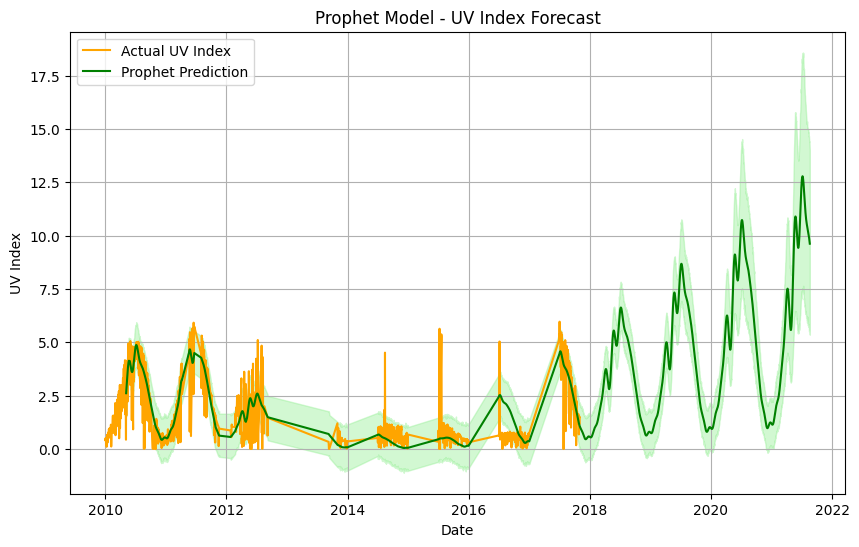

In [34]:
#Plot Predictions vs Actuals
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Actual UV Index', color='orange')
plt.plot(forecast['ds'], forecast['yhat'], label='Prophet Prediction', color='green')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='lightgreen', alpha=0.4)
plt.legend()
plt.title('Prophet Model - UV Index Forecast')
plt.xlabel('Date')
plt.ylabel('UV Index')
plt.grid(True)
plt.show()


# **5. Model Evaluation**

In [35]:
y_test = test['y'].values
y_pred = forecast['yhat'].iloc[-len(test):].values

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"✅ Mean Absolute Error (MAE): {mae:.2f}")
print(f"✅ Mean Squared Error (MSE): {mse:.2f}")
print(f"✅ Root Mean Squared Error (RMSE): {rmse:.2f}")


✅ Mean Absolute Error (MAE): 3.30
✅ Mean Squared Error (MSE): 19.96
✅ Root Mean Squared Error (RMSE): 4.47
